 !['Logos' for AAU'](logo.png)

<h2 style="text-align:center ; font-family: Playfair Display ; color:#0B9CD6">Collage of Natural and Computational Sciences</h2>
<h2 style="text-align:center ; font-family: Playfair Display ; color:#0B9CD6">Computational Data Science Program(MSc)</h2>
<h2 style="text-align:center; font-family: Playfair Display ;color:#0B9CD6">Course Title: Introduction to Computational Science and Basics of Programming</h2>


<h3 style="color:#0B9CD6 ; font-family: Playfair Display ">Project Title:</h2>


<h2 style="text-align:center ; font-family: Playfair Display ;color:#195A75  ">Simple Linear Regression to Predict Fuel Consumptions of Cars using Horsepower</h2>

<h4 style="text-align:center ;color:#195A75  ">using FORTRAN and Python</h2>

<h4 style="text-align:right ;color:#195A75  ">By: Sineshaw Legese (GSR/9323/16 )</h2>

<h4 style="text-align:right ;color:#195A75  ">Submitted To: Addisu G. Semie, PhD</h4>
<h4 style="text-align:right ;color:#195A75  ">Asst. Prof., Computational Data Science Program, Addis Ababa University</h4>

### <font color='Green'>Description of the system </font> 

>This system aim to model the relationship between fuel consumption (mpg) and horsepower(fps).
The goal is to figure out if changes in horsepower affect the fuel consumption of the cars. 
The system will examine statistical correlations between the measure of horsepower and the fuel consumptions .

>I used some python code for the first part of the project and the main program is written in Fortran

### <font color='Green'>Mathematical Representation of the system</font> 

>Simple Linear Regression Model is used to represent and built model to predict the fuel consumption<br>
$ \hat{y} = \beta _{o} + \beta _{1}*x  $

> In Our Case <br>
$ Fuel Efficiency (mpg) = \beta _{o} + \beta _{1}*Horsepower (fps)   $

><b>Where:</b><br>
$\hat{y}-$ dependent variable ( fuel efficiency )<br>
$x-$ independent variable ( horsepower )<br>


>$\beta _{o}-$ y-intercept (constant term) <br>
$\beta _{1}$ slope or the coeffiecient of horsepower(the effect of horsepower)<br>

> The goal is to estimate the parameters $\beta_{0}$ and $\beta_{1}$ that best represent the relationship between horsepower and mpg <br>

> **Slope($\beta_{1}$) :**  
       &nbsp;&nbsp;&nbsp;&nbsp;$\beta_{1} $ represents the change in the fuel consumption for each unit change in horsepower.<br>

> $$ \beta{1} = \frac{\sum (x-\bar{x})(y - \bar{y})} {\sum(x-\bar{x})^2} $$


> **$y$-intercept($\beta_{o}$) :**  
 &nbsp;estimates the fuel consumption when the horsepower is at its baseline (which may not be practically meaningful)<br>
$ \beta _{o} = \hat{y} - \beta _{1}*x $


### <font color='#097E7B'>Check Linearity Assumption</font> 

>The relationship between the independent variables and the dependent variable is assumed to be <font color=green>linear</font>. This means that changes in the independent variables are associated with a constant change in the dependent variable.

>We can check this by two ways<br>
>- [1] Measure the <font color=green> correlation</font> between independent and dependent variable.
>- [2] Plot a graph  


#### <font color='#10BAE0 '>i. Measure Person Correlation($r$)</font> 

>Correlation is a statistical measure that describes the degree to which two variables change together. In other words, it quantifies the relationship between two variables. 

>**Pearson Correlation Coefficient (r)**: This coefficient measures the linear relationship between two continuous variables. It ranges from -1 to 1, where:
>- 1 indicates a perfect positive linear relationship,
>- -1 indicates a perfect negative linear relationship, and
>- 0 indicates weak or no linear relationship.

> $$ r = \frac{ \sum (X_{i}-\bar{X})(Y_{i} - \bar{Y}) }{ \sqrt{\sum (X_{i}-\bar{X})^{2}(Y_{i} - \bar{Y}^{2})}} $$


>**Equivalent Fortran Code**

``` Fortran
program correlation
      implicit none
      ! Variable Declaration for latter use
      integer, parameter :: max_data_points = 300
      real :: horsepower(max_data_points), mpg(max_data_points), r
      integer :: data_index
      real :: sum_x, sum_y, mean_x, mean_y
      integer :: i


      ! Open and read train data from CSV file
      open(unit=10, file='auto-mpg-train.csv', status='old', action='read')
    
      data_index = 1
      do while (data_index <= max_data_points)
        read(10, *, end=100) horsepower(data_index), mpg(data_index)
        data_index = data_index + 1
      end do
      100 close(10) ! Close file


      sum_x = 0.0 ; sum_y = 0.0

      ! This subroutine calculate total sum and mean for both variables
      call sum_and_mean(horsepower, mpg, sum_x, sum_y, mean_x, mean_y)

      ! Calculate correlation
      call correlate(horsepower, mpg, sum_x, sum_y, mean_x, mean_y, r)
       
      print *, '--------------------------------------'

      print *, 'Correlation between MPG and Horsepower is : ',  r
      
      print *, '--------------------------------------'
      

contains
         ! subroutine to calculate sum and mean
        subroutine sum_and_mean(x, y, sum_x, sum_y, mean_x, mean_y)
                implicit none
                ! Input variable declaration
                real, intent(in) ::  x(:)
                real, intent(in) ::  y(:)

                ! Output variable declaration
                real, intent(out) :: sum_x, sum_y, mean_x, mean_y
                integer :: i

                do i = 1, size(x)
                    sum_x = sum_x + x(i)
                    sum_y  = sum_y  + y(i)
                end do

                ! Calculate the mean of x and y
                mean_x = sum_x /size(x)
                mean_y = sum_y /size(y)

        end subroutine sum_and_mean
        
        subroutine correlate(x, y, sum_x, sum_y, mean_x, mean_y, r)
                implicit none

                ! Input variable declaration
                real, intent(in) ::  x(:)
                real, intent(in) ::  y(:)
                real, intent(in) :: sum_x, sum_y, mean_x, mean_y
                !Output r Variable decalation
                real, intent(out) :: r
                real :: covar, var_x, var_y
                integer :: i

                ! Calculate covariance and Variance

                covar = 0.0; var_x = 0.0; var_y = 0.0
                do  i =1, size(x)
                    covar = covar + (x(i) - mean_x)*(y(i) - mean_y)
                    var_x = var_x + (x(i) - mean_x)**2
                    var_y = var_y + (y(i) - mean_y)**2

                end do


                !Calculating correlation
                r = covar / sqrt(var_x*var_y)

        end subroutine correlate

end program correlation
```

> **Python code for calculating person correlation**

In [7]:
import pandas as pd 
import numpy as np
cars_data  = pd.read_csv('auto-mpg.csv')
mpg = cars_data['mpg'].iloc[:300] 
horsepower = cars_data['horsepower'].iloc[:300]
print(f"Correlation {cars_data['mpg'].corr(horsepower)} ")

Correlation -0.8002739223633892 


>From the above Result, we can see that there is a Negative correlation between the Mpg and
horsepower. This means if we increase the value of mpg the value of the horspower
will decrease. And **-0.803** indicate that there is a significant correlation between both variables.

#### <font color='#10BAE0 '>ii. Graph Ploting </font> 

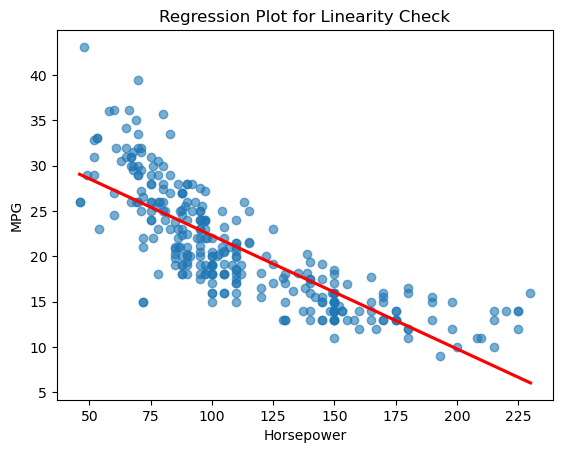

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assign the data for the regression variables

X = np.array(horsepower).reshape((-1, 1))
y = np.array(mpg).reshape((-1, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Create a regression plot
sns.regplot(x=X.flatten(), y=y.flatten(), ci=None, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Regression Plot for Linearity Check')
plt.show()


>We can see from the regression plot that there is a negative linear relationship between predictor variable horsepower and the response variable mpg. So we can built an simple illustrator model.

### <font color='Green'>Solving Equations using FORTRAN:</font> 

>The aim of this program is to calculate the slope and intercept of regression variables and make prediction based on it. <br>
>I used 300 data for training the model and 98 data for testing the  model

```fortran
program simple_linear_regression
      implicit none
      ! Variable Declaration for latter use
      integer, parameter :: max_data_points = 300
      real :: horsepower_train(max_data_points), mpg_train(max_data_points)
      real :: horsepower_test(98), mpg_predict(98)
      real :: b1, bo, predictions(98)
      integer :: data_index
      real :: sum_x, sum_y, mean_x, mean_y
      integer :: i


      ! Open and read train data from CSV file
      open(unit=10, file='auto-mpg-train.csv', status='old', action='read')
    
      data_index = 1
      do while (data_index <= max_data_points)
        read(10, *, end=100) horsepower_train(data_index), mpg_train(data_index)
        data_index = data_index + 1
      end do
      100 close(10) ! Close file

      ! Open and read test data from CSV file
      open(unit=11, file='auto-mpg-test.csv', status='old', action='read')
      data_index = 1
      do while (data_index <= 98)
        read(11, *, end=101) horsepower_test(data_index)
        data_index = data_index + 1
      end do
      101 close(11) ! Close file

      sum_x = 0.0 ; sum_y = 0.0

      ! This subroutine calculate total sum and mean for both variables
      call sum_and_mean(horsepower_train, mpg_train, sum_x, sum_y, mean_x, mean_y)

      ! Calculate slope
      call slope(horsepower_train, mpg_train, sum_x, sum_y, mean_x, mean_y, b1)
      !calculate coefficient
      call intercept(b1, mean_x, mean_y, bo)

        
      print *, '--------------------------------------'

      print *, 'Coefficient ',  b1
      print *, 'Intercept',  bo
      
      print *, '--------------------------------------'
      
      !make prediction on taste data
      call predict(bo, b1, horsepower_test, predictions)

      !Display predicted output
      do i = 1, 6
        write (*,*) 'X = ', horsepower_test(i), ', Predicted Y = ', predictions(i)
      end do



contains

        subroutine sum_and_mean(x, y, sum_x, sum_y, mean_x, mean_y)
                implicit none
                ! Input variable declaration
                real, intent(in) ::  x(:)
                real, intent(in) ::  y(:)

                ! Output variable declaration
                real, intent(out) :: sum_x, sum_y, mean_x, mean_y
                integer :: i

                do i = 1, size(x)
                    sum_x = sum_x + x(i)
                    sum_y  = sum_y  + y(i)
                end do

                ! Calculate the mean of x and y
                mean_x = sum_x /size(x)
                mean_y = sum_y /size(y)

        end subroutine sum_and_mean

        subroutine slope(x, y, sum_x, sum_y, mean_x, mean_y, b1)
                implicit none

                ! Input variable declaration
                real, intent(in) ::  x(:)
                real, intent(in) ::  y(:)
                real, intent(in) :: sum_x, sum_y, mean_x, mean_y
                !Output Slope Variable decalation
                real, intent(out) :: b1
                real :: covar, var
                integer :: i

                ! Calculate covariance and Variance

                covar = 0.0; var = 0.0
                do  i =1, size(x)
                    covar = covar + (x(i) - mean_x)*(y(i) - mean_y)
                    var = var + (x(i) - mean_x)**2
                end do


                !Calculating slope 
                b1 = covar / var

        end subroutine slope
        subroutine intercept(b1,mean_x,mean_y, bo)
               implicit none
               ! Input variable declaration
               real, intent(in) ::  b1
               real, intent(in) ::  mean_x, mean_y
               ! Output slope  variable declaration
               real, intent(out) :: bo

               bo = mean_y - b1*mean_x

        end subroutine intercept

        subroutine predict(bo, b1, new_x, predictions)
                implicit none
                real, intent(in):: bo, b1, new_x(:)
                real, intent(out):: predictions(:)
                integer i


                do i=1, size(new_x)
                        predictions(i) = bo - b1 * new_x(i)
                end do

        end subroutine predict

end program simple_linear_regression

```



### <font color='Green'>Interpretaion of the Model:</font> 

**Slope $(m): -0.1251$**
The negative sign of the slope indicates an inverse relationship between the mpg and horsepower.
The slope represents the change in the dependent variable (mpg) for a one-unit change in the independent variable (horsepower).
In this case, for every one-unit increase in the independent variable, the dependent variable decreases by 0.1251 units.

**Coefficient of regression variables** $(b): 34.8073$

The coefficient of the regression variable represents the y-intercept, the value of the dependent variable (Y) when the independent variable (x) is zero(the value of the dependent variable (mpg) when the independent variable (horsepower) is zero.)
In this case, when the independent variable is zero, the predicted value of the dependent variable is 34.8073.
So, you could interpret the results as follows:

The dependent variable is expected to decrease by approximately 0.1251 units for every one-unit increase in the independent variable.
When the independent variable is zero, the predicted value of the dependent variable is approximately 34.8073.

**<font color = green>NOTE</font>** -This project is just to show how to calcualte simple linear regression to find the relationship between two variables. In does't mean that the horsepower is enough predictor of fuel efficiency. We can add more independet variables to accurate our model in this case our model sayed to be **<font color = green>"Multiple Linear Regression" Model</font>**